In [9]:
#veriyi düzenlemedim. early stop ve dropout'u öğrenmek için yaptığım model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_excel("maliciousornot.xlsx")

In [5]:
df.head()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [7]:
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [8]:
X = df.drop("Type", axis = 1).values
y = df["Type"].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 ,
                                                    random_state = 42)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
X_train.shape

(383, 30)

In [17]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #units : nöron birimi
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [19]:
model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 700,
          verbose = 1)

Epoch 1/700
12/12 [==============================] - 1s 21ms/step - loss: 0.6897 - val_loss: 0.6855
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6816 - val_loss: 0.6782
Epoch 3/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6731 - val_loss: 0.6681
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6618 - val_loss: 0.6548
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6462 - val_loss: 0.6332
Epoch 6/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6201 - val_loss: 0.6011
Epoch 7/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5886 - val_loss: 0.5637
Epoch 8/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5515 - val_loss: 0.5218
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5087 - val_loss: 0.4702
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4606 - val_loss: 0.4210
Epoch 11

In [20]:
kayıp = pd.DataFrame(model.history.history)

<Axes: >

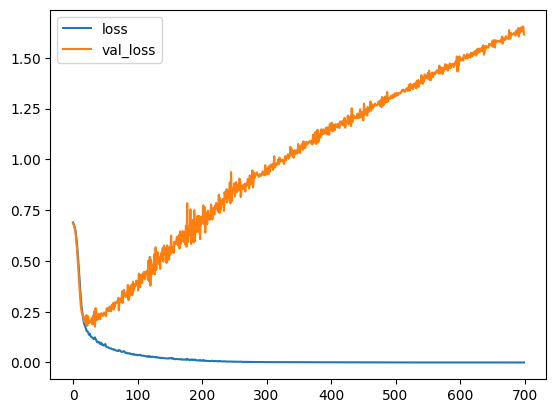

In [21]:
kayıp.plot()

Model overfitting durumunda. Çözüm olarak val_loss artmaya başladığında çalışmayı durduracağız (early stopping)

##EARLY STOPPING

In [25]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #units : nöron birimi
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [26]:
earlyStopping = EarlyStopping(monitor = "val_loss",
                              verbose = 1,
                              mode = "min",
                              patience = 25)
#patience verilen sayı kadar çalıştırır iyileşme göremezse durdurur.
#mode = "min", "max", "auto"

In [27]:
model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 700,
          verbose = 1,
          callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.6895 - val_loss: 0.6837
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6748 - val_loss: 0.6681
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6579 - val_loss: 0.6483
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6384 - val_loss: 0.6278
Epoch 5/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6149 - val_loss: 0.6036
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.5911 - val_loss: 0.5776
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5634 - val_loss: 0.5485
Epoch 8/700
12/12 [==============================] - 0s 6ms/step - loss: 0.5326 - val_loss: 0.5127
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4950 - val_loss: 0.4685
Epoch 10/700
12/12 [==============================] - 0s 6ms/step - loss: 0.4521 - val_loss: 0.4213
Epoch 11

<Axes: >

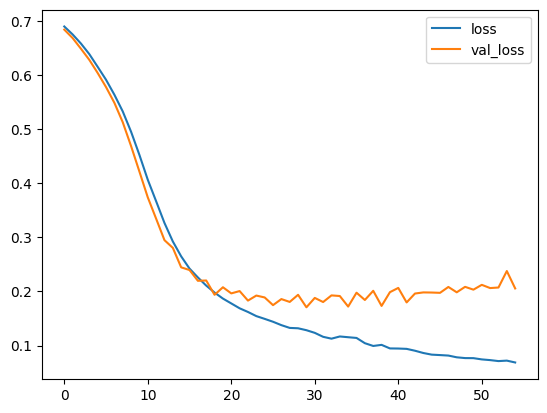

In [28]:
modelKaybı = pd.DataFrame(model.history.history)
modelKaybı.plot()

##DROPOUT

In [29]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu")) #units : nöron birimi
model.add(Dropout(0.6))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [30]:
model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 700,
          verbose = 1,
          callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 13ms/step - loss: 0.6937 - val_loss: 0.6793
Epoch 2/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6966 - val_loss: 0.6752
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.7044 - val_loss: 0.6735
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6845 - val_loss: 0.6709
Epoch 5/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6846 - val_loss: 0.6675
Epoch 6/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6692 - val_loss: 0.6643
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6778 - val_loss: 0.6608
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6592 - val_loss: 0.6556
Epoch 9/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6656 - val_loss: 0.6505
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6671 - val_loss: 0.6454
Epoch 11

<Axes: >

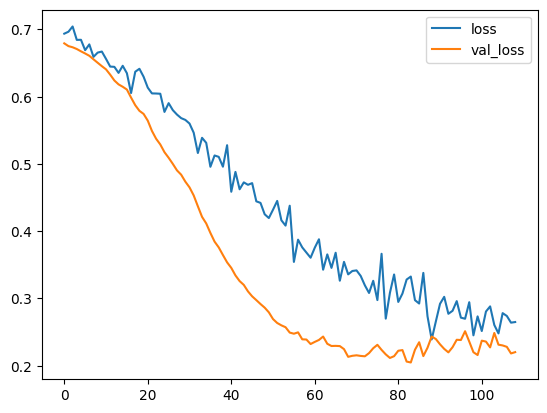

In [31]:
Kayıp = pd.DataFrame(model.history.history)
Kayıp.plot()

In [34]:
#tahmin = model.predict_classes(X_test)
tahmin = np.argmax(model.predict(X_test), axis=-1)

6/6 [==============================] - 0s 2ms/step


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74        96
           1       0.00      0.00      0.00        69

    accuracy                           0.58       165
   macro avg       0.29      0.50      0.37       165
weighted avg       0.34      0.58      0.43       165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(confusion_matrix(y_test, tahmin))
#yukarıdaki sıfır şunu demek istiyor: 0 tane değeri yanlış bulmuş.

[[96  0]
 [69  0]]
